# Meko računanje
Pripremio: Dimitrije Milenković

Mentor: prof. dr. Mirko Vujošević

# Demo projekat: Klasifikacija slika

U ovom demo projektu biće prikazana izgradnja modela koji klasifikuje slike odeće na odevne predmete.

Za demo je korišćen dataset ugrađen u Tensorflow biblioteku. Čitav proces biće ukratko objašnjen. 

**Važno:** Ova radna sveska prvenstveno demonstrira korišćenje TensorFlowa za izgradnju modela dubinskog učenja. S toga, akcenat je na kodu i rezultatima. Sav tekst i slike služe kao beleške, s toga nisu formalno i pravilno formatirane, te su moguće greške. Isključivo ih posmatrati kao komentare uz kod. 

Na poćetku inicijalizujemo okruženje i učitavamo potrebne pakete.

## Inicijalizacija okruženja

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


## Učitavanje i prvi uvid u podatke

Dataset koji će se koristiti je Fashion MNIST dataset za klasifikaciju delova odeće. Deo njega predstavljen je slikom ispod, a kompletan set se može naći na [Githubu](https://github.com/zalandoresearch/fashion-mnist). Takođe, ovaj set je ugrađen u TensorFlow tako da ćemo ga mi učitati direktno iz biblioteke.

![fashion](https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png)

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)


60000

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_images)

10000

## Preprocesiranje podataka

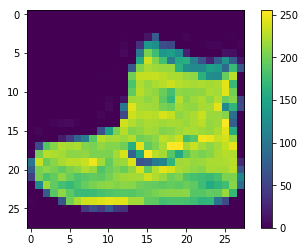

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
# skaliranje 
train_images = train_images / 255.0
test_images = test_images / 255.0

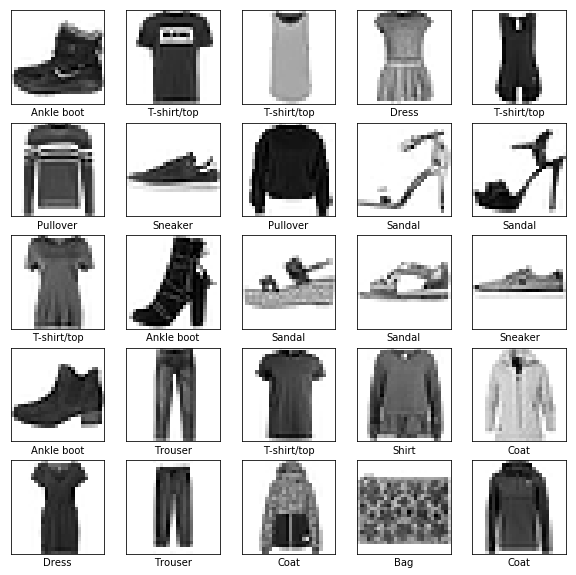

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Izgradnja modela

### Podešavanje slojeva

Osnovni gradivni blokovi neuronskih mreža su nivoi. Nivoi predstavljaju reprezentaciju podataka i obično se mreža sastoji od više ulančanih nivoa. 

U našem slučaju, prvi nivo je `Flatten` nivo koji služi da reperezentaciju 28x28 multidimenzionalnog niza transformiše u jednodimenizonalni niz dućine 784 (28*28=784). Dakle, ovaj nivo nema parametre koje uči već samo služi za reformatiranje podataka.

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


Sledeća dva nivoa su `Dense` nivoi, to su nivoi koji su potpuno povezani. Prvi ima 128 neurona, sa `relu` aktivacionom funkcijom, dok drugi ima 10 neurona sa softmax aktivacionom funkcijuom i na izlazu daje 10 neurona koji su zapravo verovatnoće da slika pripada jednoj od 10 klasa. 

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Treniranje modela

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.5049 - acc: 0.8220
Epoch 2/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3772 - acc: 0.8645
Epoch 3/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3366 - acc: 0.8774
Epoch 4/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.3140 - acc: 0.8861
Epoch 5/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2946 - acc: 0.8902
Epoch 6/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2824 - acc: 0.8956
Epoch 7/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.2671 - acc: 0.9001
Epoch 8/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2568 - acc: 0.9052
Epoch 9/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.2464 - acc: 0.9071
Epoch 10/10
60000/60000 [==============================] - 5s 76us/sample - loss: 

## Evaluacija

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.3397 - acc: 0.8760

Test accuracy: 0.876


## Predviđanje

In [16]:
predictions = model.predict(test_images)

In [17]:
predictions[0]

array([1.9975648e-08, 2.8827706e-12, 1.4078704e-06, 2.2679107e-08,
       2.0263675e-09, 3.6995206e-03, 1.9562447e-07, 5.7724998e-03,
       2.4012945e-06, 9.9052387e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
class_names[np.argmax(predictions[0])]

'Ankle boot'

In [20]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

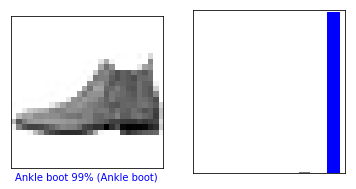

In [21]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

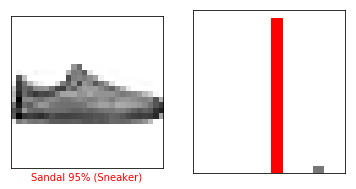

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

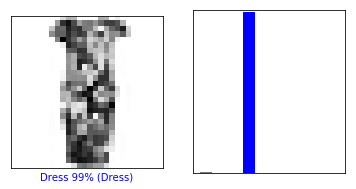

In [23]:
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

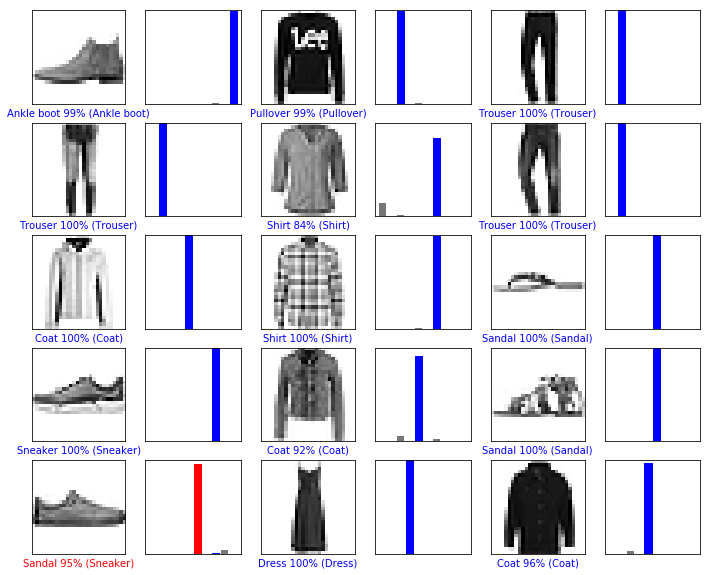

In [24]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [25]:
img = test_images[0]

print(img.shape)

(28, 28)


In [26]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [27]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.9975650e-08 2.8827763e-12 1.4078706e-06 2.2679110e-08 2.0263640e-09
  3.6995176e-03 1.9562449e-07 5.7724975e-03 2.4012948e-06 9.9052399e-01]]


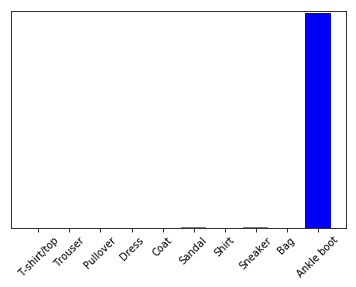

In [28]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [29]:
class_names[np.argmax(predictions_single[0])]

'Ankle boot'

## Literatura

- [Tensorflow Image Classification](https://www.tensorflow.org/beta/tutorials/keras/basic_classification)